# Linear Regression OLS

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
class LinearRegressionOLS:
    """This performs Linear regression OLS
    
    This will only work for a single variable, it is not sutiable for multi-variate regression"""
    
    def fit(self, x_train, y_train):
        self.__y_train = y_train
        self.__x_train = x_train
        
        # Get mean, variance & std values
        self.__mean_x = self.__mean(self.__x_train)
        self.__mean_y = self.__mean(self.__y_train)
        
        self.__variance_x = self.__variance(self.__x_train)
        self.__variance_y = self.__variance(self.__y_train)
        
        self.__std_x = self.__std('x')
        self.__std_y = self.__std('y')
        
        print("mean:", self.__mean_x, "var:", self.__variance_x, "std:", self.__std_x)
        
        # Get Covariance
        self.covariance = self.__get_covariance()
        # Get B1/B0
        self.B1 = self.covariance / self.__variance_x
        self.B0 = self.__mean_y - self.B1 * self.__mean_x
        self.CORR = self.covariance / (self.__std_x * self.__std_y) 
        self.r_squared = self.CORR**2
        
    def predict(self, x_test):
        predictions = list()
        for item in x_test:
            predictions.append(self.B0 + self.B1 * item)
        return predictions
    
    def __mean(self, values):
        return sum(values)/len(values)
    
    def __variance(self, values):    
        return (sum((x - self.__mean_x)**2 for x in values)) / len(values)
    
    def __std(self, value):
        if value == "x": 
            return math.sqrt(self.__variance_x)
        else:
            return math.sqrt(self.__variance_y)
        
    def __get_covariance(self):
        covar = 0
        for i in range(len(self.__x_train)):
            covar += ((self.__x_train[i] - self.__mean_x) * (self.__y_train[i] - self.__mean_y))
        return covar/len(self.__x_train)
    
    def draw(self):
        # Find two random points on the line
        point_1 = classifier.B0 + (0 * classifier.B1)
        point_2 = classifier.B0 + (2 * classifier.B1)
        sns.set_style("darkgrid")
        plt.plot([0,2], [point_1, point_2], 'r-')
        # Draw the data points
        plt.scatter(list(df.x), list(df.y))
        plt.show()

In [3]:
df = pd.read_csv("hubble.csv")

In [4]:
classifier = LinearRegressionOLS()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(list(df.x), list(df.y), test_size = .2)

In [6]:
classifier.fit(df.x, df.y)

mean: 0.911375 var: 0.399303734375 std: 0.6319048459815765


In [7]:
classifier.B1

454.15844092262836

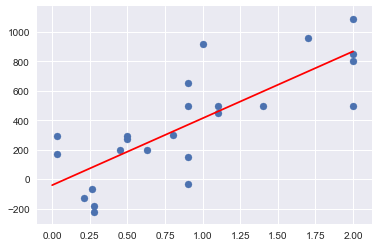

In [8]:
classifier.draw()

## Evaluate the model

In [9]:
predictions = classifier.predict(X_test)

In [10]:
# What is the mean absolute error?
error = 0
for i in range(len(predictions)):
    error += abs(predictions[i] - y_test[i])

In [11]:
error

746.81832388009434